In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [3]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.duplicated().sum()

0

In [18]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [19]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [23]:
data[data["reading score"]==100]["reading score"].count()

17

In [24]:
data["average"] = (data["reading score"] + data["math score"] + data["writing score"])/3

In [25]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


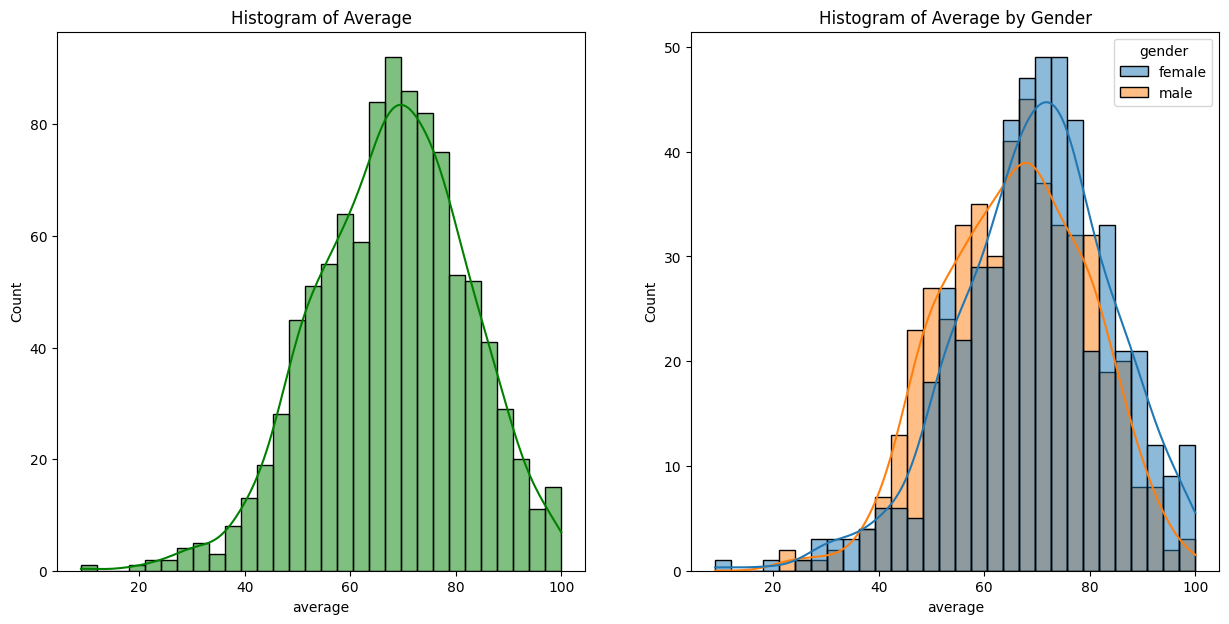

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # Create a grid of 1 row and 2 columns for subplots

sns.histplot(data=data, x='average', bins=30, kde=True, color='g', ax=axs[0])  # Plot on the first subplot
axs[0].set_title('Histogram of Average')  # Set title for the first subplot

# Plot on the second subplot with differentiating histograms by gender
sns.histplot(data=data, x='average', bins=30, kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Histogram of Average by Gender')  # Set title for the second subplot

plt.show()

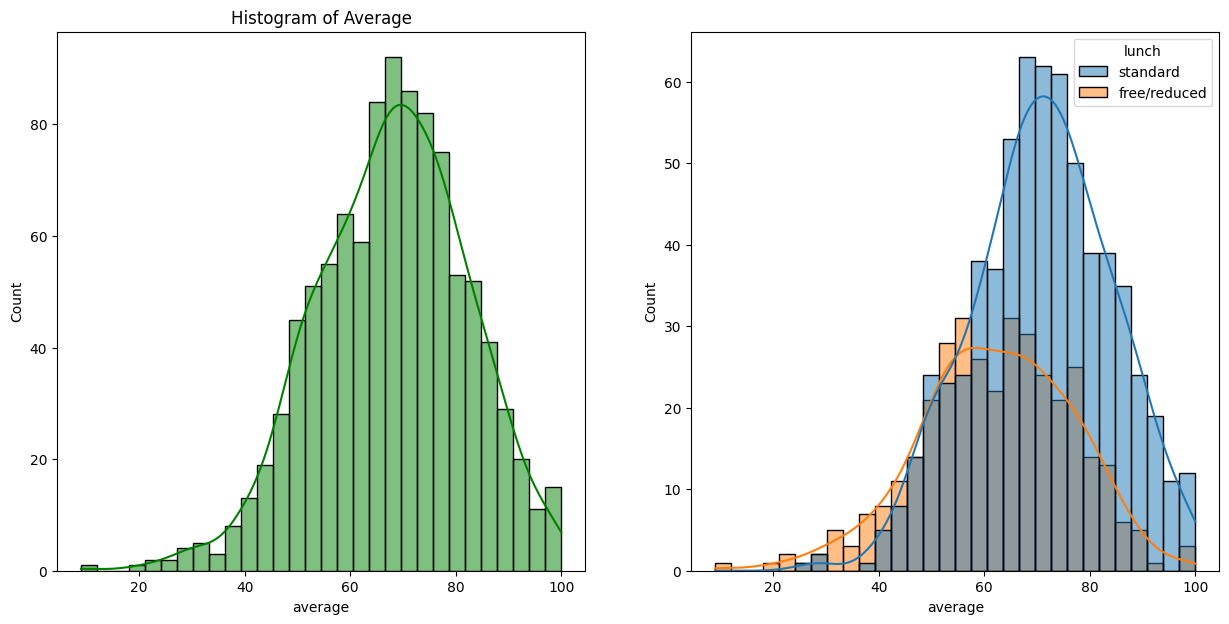

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=data, x='average', bins=30, kde=True, color='g', ax=axs[0])  # Plot on the first subplot
axs[0].set_title('Histogram of Average') 
sns.histplot(data = data , kde= True,x='average',hue='lunch',ax=axs[1],bins=30)
plt.show()

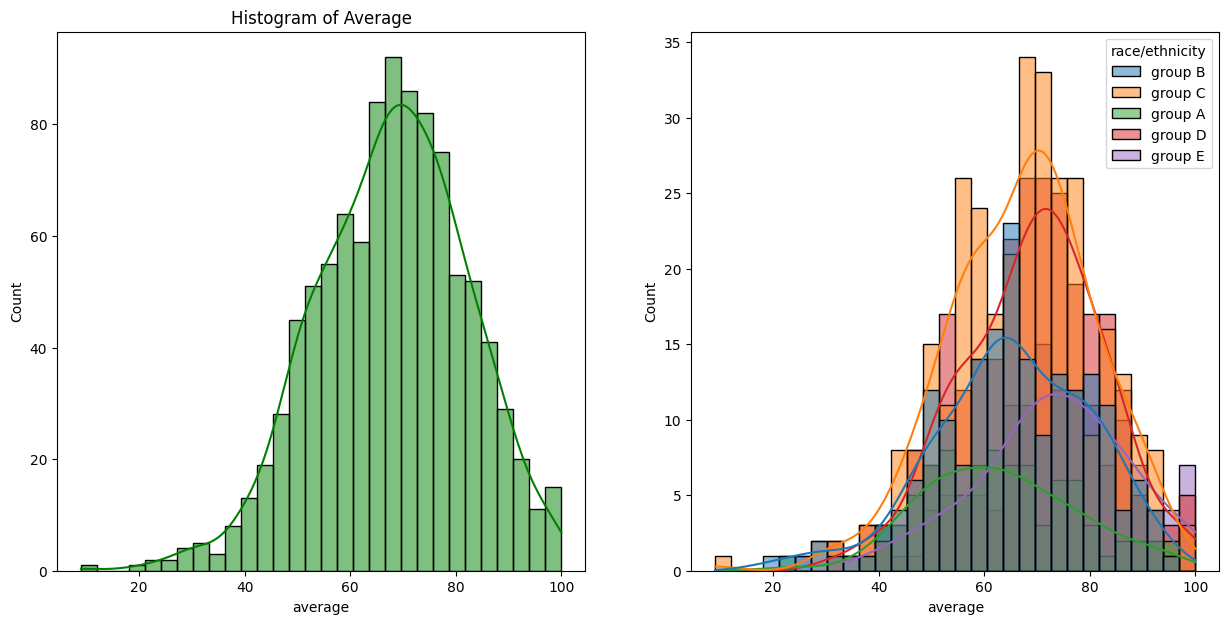

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=data, x='average', bins=30, kde=True, color='g', ax=axs[0])  # Plot on the first subplot
axs[0].set_title('Histogram of Average') 
sns.histplot(data = data , kde= True,x='average',hue='race/ethnicity',ax=axs[1],bins=30)
plt.show()

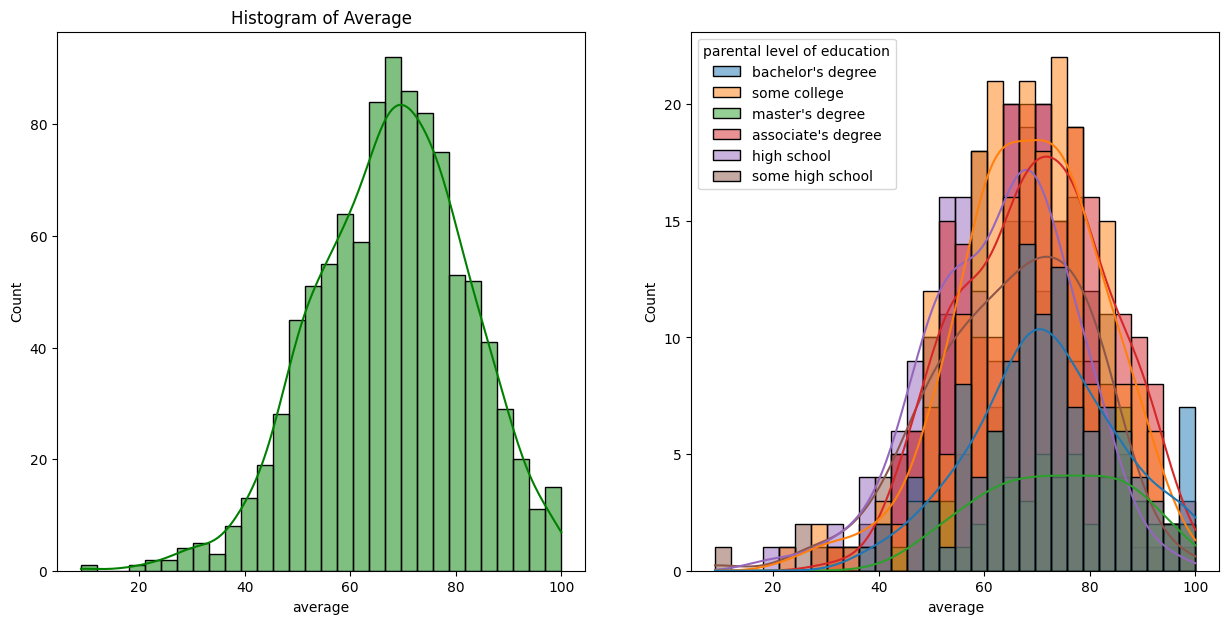

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=data, x='average', bins=30, kde=True, color='g', ax=axs[0])  # Plot on the first subplot
axs[0].set_title('Histogram of Average') 
sns.histplot(data = data , kde= True,x='average',hue='parental level of education',ax=axs[1],bins=30)
plt.show()

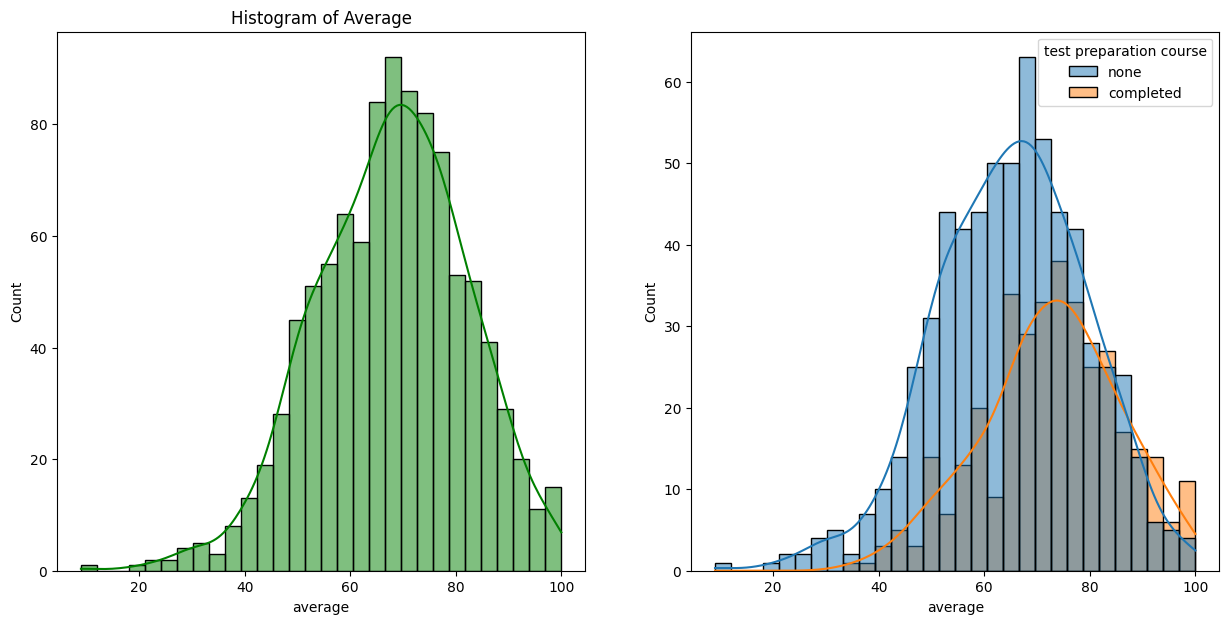

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=data, x='average', bins=30, kde=True, color='g', ax=axs[0])  # Plot on the first subplot
axs[0].set_title('Histogram of Average') 
sns.histplot(data = data , kde= True,x='average',hue='test preparation course',ax=axs[1],bins=30)
plt.show()

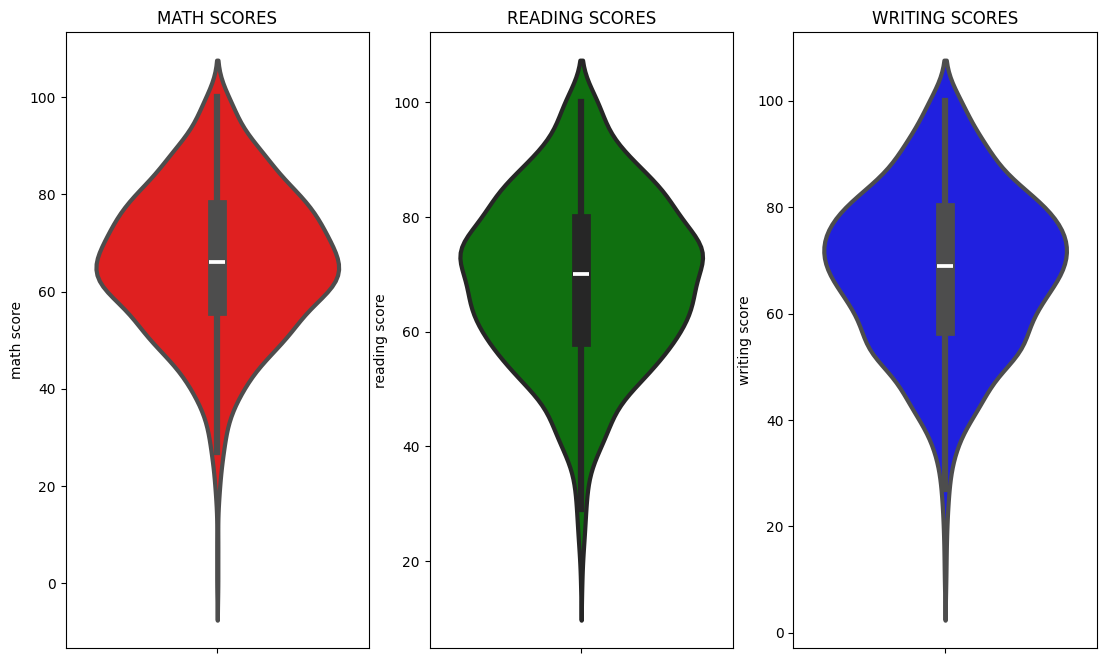

In [40]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=data,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=data,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=data,color='blue',linewidth=3)
plt.show()

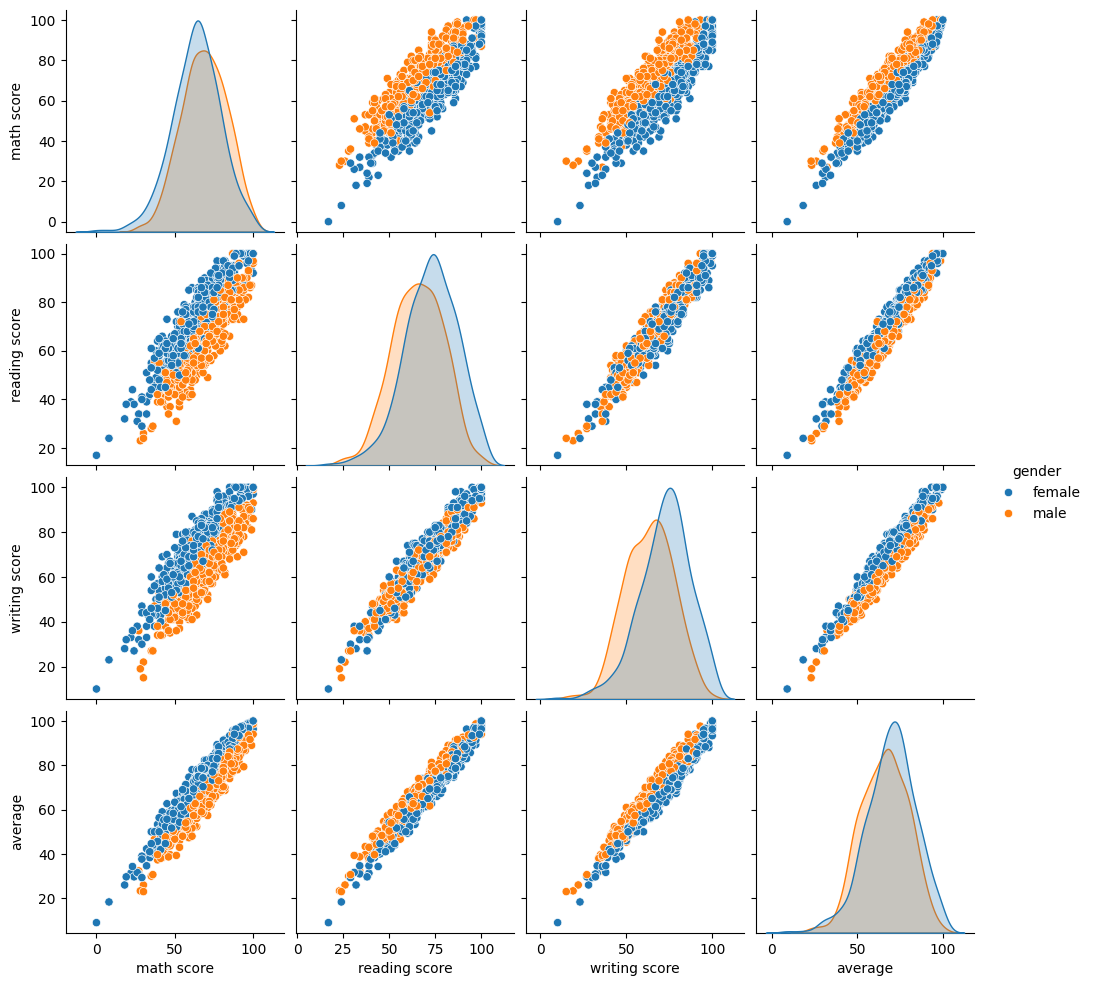

In [41]:
sns.pairplot(data,hue = 'gender')
plt.show()

## MODEL TRAINING


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [59]:
X = data.drop(["math score","average"],axis=1)

In [60]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [61]:
Y = data["math score"]

In [ ]:
num_columns = X.data